In [221]:
from matplotlib import pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np

data = pd.read_csv('data-sets/BTC-USD-5D.csv')
data = data['Adj Close']
print(data)
data.index = pd.date_range(start='2017-11-20', end='2022-11-20')

from statsmodels.tsa.stattools import adfuller
result = adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')


0        8200.639648
1        8071.259766
2        8253.549805
3        8038.770020
4        8253.690430
            ...     
1822    16669.439453
1823    16687.517578
1824    16697.777344
1825    16711.546875
1826    16559.720703
Name: Adj Close, Length: 1827, dtype: float64
ADF Statistic: -1.316969
p-value: 0.621374
Critical Values:


In [222]:
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

	1%: -3.434
	5%: -2.863
	10%: -2.568


Text(0.5, 1.0, '2nd Order Differencing')

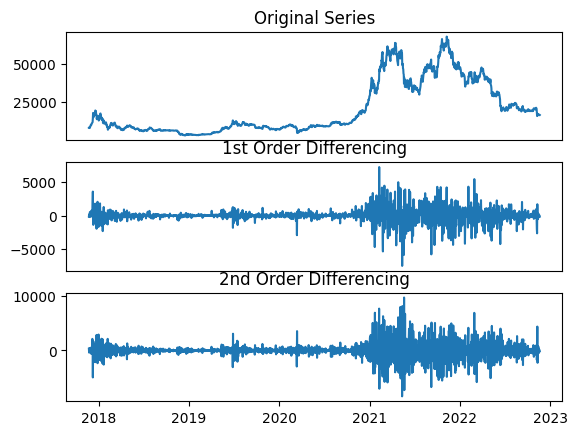

In [223]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data.values); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(data.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(data.diff().diff()); ax3.set_title('2nd Order Differencing')

/opt/homebrew/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


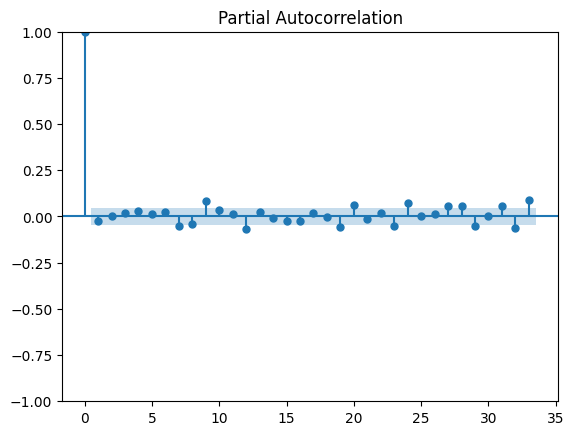

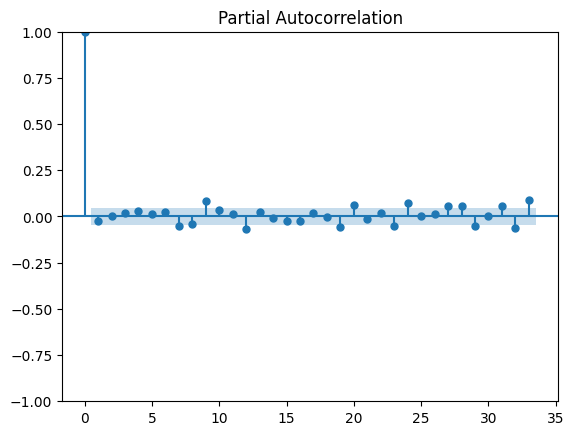

In [224]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data.diff().dropna())

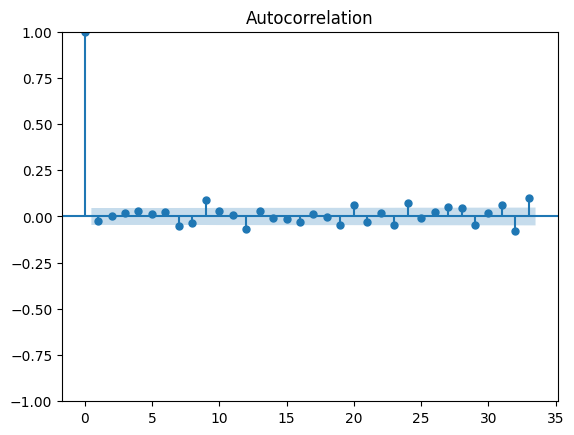

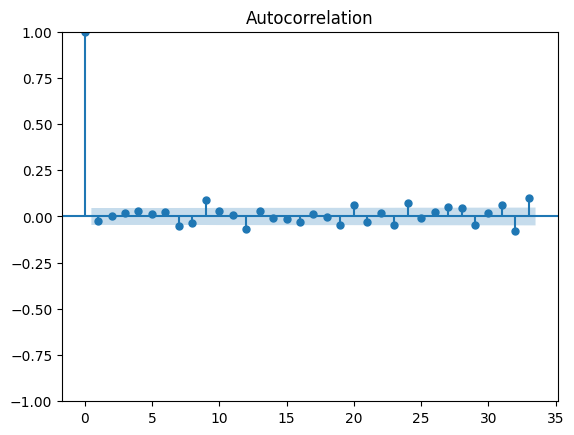

In [225]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data.diff().dropna())

In [226]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data, order = (5,2,2))
model_fit = model.fit()

# p = 8 sectik cünkü pacf grafiğinde 8 den sonra oldukça fazla değişim görülüyor.

# q = 1 sectik cunku acf grafiginde 1'den sonra oldukca fazla degisim goruluyor.

# d = 1 sectik cünkü veride tren

predicted_data = model_fit.predict(start="2020-11-20", end="2022-11-20")
new_data = data['2020-11-20':]



In [227]:
error = abs(np.divide((np.subtract(new_data.values, predicted_data.values)), new_data.values) * 100)
error_index = new_data.index

[[4.03185799e+00]
 [1.22731164e-01]
 [1.70631388e+00]
 [2.59249503e-01]
 [3.67430810e+00]
 [2.04918818e+00]
 [9.32856420e+00]
 [5.67248809e-01]
 [3.30017440e+00]
 [2.69524198e+00]
 [7.64934531e+00]
 [4.18810764e+00]
 [1.76409067e+00]
 [9.70360251e-01]
 [4.27293466e+00]
 [2.16682265e+00]
 [9.37477473e-01]
 [8.57167846e-01]
 [4.79090514e+00]
 [1.05190708e+00]
 [1.66261149e+00]
 [1.15811620e+00]
 [4.01549144e+00]
 [1.86149185e+00]
 [5.58842006e-01]
 [8.00389196e-01]
 [8.71032664e+00]
 [6.54744565e+00]
 [1.40966843e+00]
 [2.81138050e+00]
 [2.09375658e+00]
 [3.48704782e+00]
 [3.74253508e+00]
 [2.43354969e+00]
 [1.98838829e+00]
 [3.77711559e+00]
 [6.66766006e+00]
 [5.97245126e-01]
 [2.78872298e+00]
 [7.38630326e-01]
 [4.80458084e+00]
 [4.24272799e-01]
 [1.06169495e+00]
 [8.35518197e+00]
 [1.91308967e+00]
 [2.73060170e+00]
 [5.59473294e+00]
 [7.43632215e+00]
 [6.38127745e+00]
 [3.44757894e+00]
 [1.65221961e+00]
 [5.54432836e+00]
 [8.52451854e+00]
 [5.37102943e+00]
 [8.99662115e+00]
 [5.205666

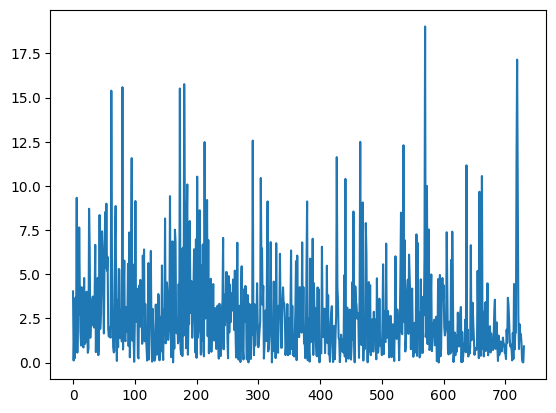

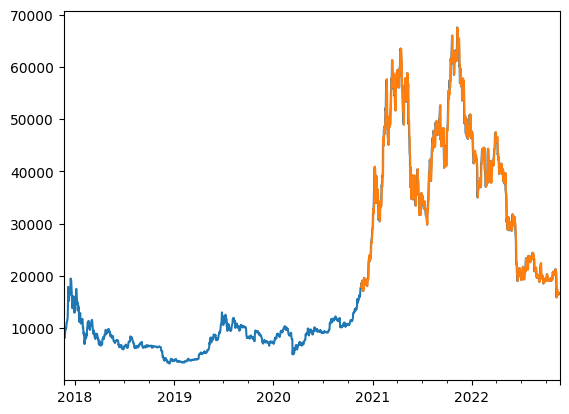

In [228]:
error_df = pd.DataFrame(error, error_index)
print(error_df.values)
plt.plot(error_df.values)

fig, ax = plt.subplots()

ax = data.loc['2017-11-20':].plot(ax=ax)
predicted_data.plot(ax=ax)

plt.show()